In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [27]:
# Inspect column names for potential mismatches
print("Customers Columns:", customers.columns)
print("Products Columns:", products.columns)
print("Transactions Columns:", transactions.columns)

Customers Columns: Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')
Products Columns: Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')
Transactions Columns: Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')


In [28]:
# Aggregate transaction data for each customer
customer_transactions = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',      # Total revenue per customer
    'TransactionID': 'count', # Total transactions per customer
    'Quantity': 'sum'         # Total quantity purchased
}).reset_index()


In [29]:
# Merge customer data with aggregated transaction data
customers.rename(columns={'ï»¿CustomerID': 'CustomerID'}, inplace=True)  # Fix encoding issues
customer_data = pd.merge(customers, customer_transactions, on='CustomerID', how='left')
customer_data.fillna(0, inplace=True)

In [30]:
# Drop irrelevant columns for clustering
customer_data_clustering = customer_data.drop(columns=['CustomerID', 'SignupDate', 'CustomerName'])

In [31]:
# One-hot encode categorical variables (e.g., Region)
customer_data_clustering = pd.get_dummies(customer_data_clustering, columns=['Region'], drop_first=True)

In [32]:
# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data_clustering)

In [ ]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

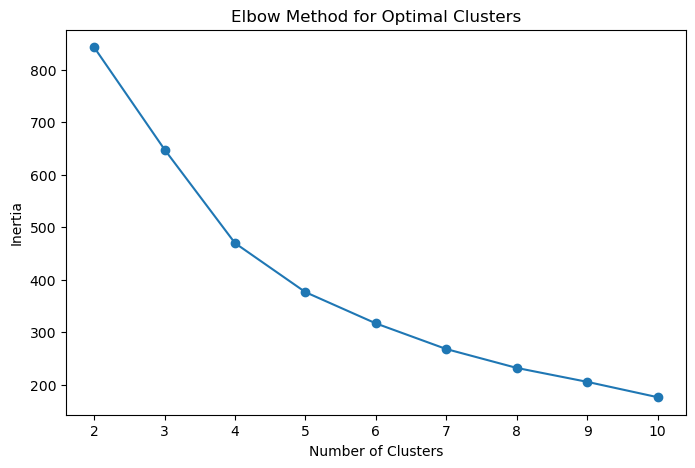

In [34]:
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Perform clustering with the optimal number of clusters
optimal_clusters = 4  # Based on the Elbow Method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

In [ ]:
# Perform clustering with the optimal number of clusters
optimal_clusters = 4  # Based on the Elbow Method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

In [37]:

# Visualize clusters using PCA (dimensionality reduction)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

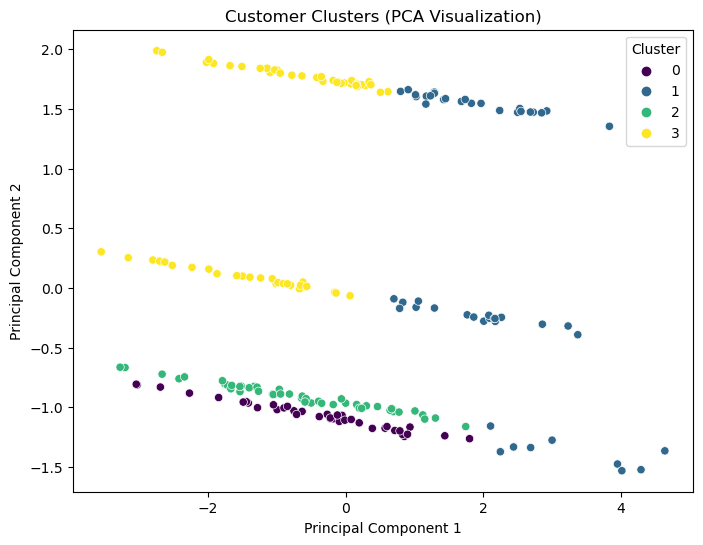

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=customer_data['Cluster'], palette='viridis')
plt.title('Customer Clusters (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()